In [1]:
import sys
sys.path.append('../')

import os
from PIL import Image
from glob import glob

In [2]:
from wmdetection.models import get_watermarks_detection_model
from wmdetection.pipelines.predictor import WatermarksPredictor
from wmdetection.utils import list_images

In [3]:
model, transforms = get_watermarks_detection_model('convnext-tiny', fp16=False)

/home/jovyan/.imgenv-pavlov-develop-1a100-0/lib/python3.7/site-packages/huggingface_hub/file_download.py:985: FutureWarning: The `force_filename` parameter is deprecated as a new caching system, which keeps the filenames as they are on the Hub, is now in place.
  FutureWarning,


In [13]:
images = list_images('images/watermark/')+list_images('images/clear/')
images

['images/watermark/1.jpg',
 'images/watermark/2.jpg',
 'images/watermark/3.jpg',
 'images/watermark/4.jpg',
 'images/clear/1.jpg',
 'images/clear/2.jpg',
 'images/clear/3.jpg',
 'images/clear/4.jpg']

In [14]:
predictor = WatermarksPredictor(model, transforms, 'cuda:0')

In [15]:
predictor.run(images)

100%|██████████| 1/1 [00:02<00:00,  2.47s/it]


[1, 1, 1, 1, 0, 0, 1, 0]

In [16]:
predictor.predict_image(Image.open(images[0]))

1

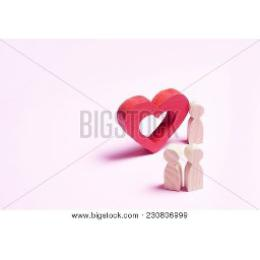

In [18]:
Image.open(images[0])